In [119]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [120]:
# Open file
efficiency_fva = pd.read_csv('offensive_efficiency_scores_with_past_seasons.csv')

In [121]:
# Change wins and losses to numerical value
dummy = pd.get_dummies(efficiency_fva['WinOrLoss'])
efficiency_fva = pd.concat([efficiency_fva, dummy], axis = 1)
efficiency_fva.head()

,DateOfGame,Team,Opponent,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,WinOrLoss,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
0,12/3/2020,Kaukauna,Appleton North,73,51,20,10,7,11,Win,0.457627,33.406780,35.841356,0,1
1,12/4/2020,Kaukauna,Oshkosh West,72,48,25,3,14,10,Win,0.565217,40.695652,46.709565,0,1
2,12/8/2020,Kaukauna,Appleton East,86,56,27,6,14,15,Win,0.518987,44.632911,50.154937,0,1
3,12/11/2020,Kaukauna,Hortonville,72,55,25,12,14,21,Win,0.500000,36.000000,41.320000,0,1
4,12/12/2020,Kaukauna,De Pere,61,54,21,6,13,7,Loss,0.500000,30.500000,35.440000,1,0


In [122]:
# Create table with numeric values 
efficiency_fva_num = efficiency_fva.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [123]:
# Differences in wins and losses
win = efficiency_fva_num[efficiency_fva_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = efficiency_fva_num[efficiency_fva_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win.describe()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,74.178182,52.803636,26.789091,8.538182,15.669091,10.621818,0.598316,44.912956,52.097024
std,11.632177,8.850625,5.597760,4.181271,4.851400,4.177044,0.074516,11.328978,13.617460
min,47.000000,35.000000,14.000000,0.000000,4.000000,1.000000,0.403226,20.210526,23.090526
25%,66.000000,46.000000,23.000000,5.000000,12.000000,8.000000,0.546771,36.172331,42.508773
50%,74.000000,52.000000,27.000000,8.000000,15.000000,11.000000,0.596491,44.054795,51.959322
75%,82.000000,59.000000,30.000000,11.000000,18.000000,13.000000,0.652778,52.049228,60.550853
max,108.000000,78.000000,43.000000,24.000000,30.000000,25.000000,0.800000,82.329545,97.823182


In [124]:
# Now losses
loss.describe()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.595000,49.805000,21.560000,6.83000,12.130000,13.495000,0.489430,29.767665,34.415559
std,10.987475,7.481097,4.843936,3.50894,4.364441,5.828364,0.082679,9.311686,10.970785
min,20.000000,25.000000,9.000000,0.00000,0.000000,0.000000,0.219512,4.390244,4.390244
25%,53.000000,44.000000,18.000000,4.00000,9.000000,9.000000,0.422571,22.447262,25.337500
50%,60.000000,50.000000,21.000000,7.00000,12.000000,13.000000,0.492186,29.486235,33.996894
75%,66.000000,54.000000,25.000000,9.00000,15.000000,17.000000,0.552255,36.507722,42.318261
max,85.000000,72.000000,35.000000,21.00000,28.000000,35.000000,0.693878,54.296703,68.561319


In [125]:
# Correlations
efficiency_correlations = efficiency_fva_num.corr()
efficiency_correlations

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.546261,0.865947,0.255933,0.561755,-0.205591,0.744957,0.939935,0.916412,-0.535966,0.535966
FieldGoalAttempts,0.546261,1.000000,0.681588,0.600324,0.400990,-0.093042,0.280236,0.459587,0.461540,-0.175921,0.175921
FieldGoalsMade,0.865947,0.681588,1.000000,0.319349,0.634364,-0.143875,0.783184,0.888648,0.886343,-0.439096,0.439096
OffensiveRebounds,0.255933,0.600324,0.319349,1.000000,0.220499,0.094077,0.243366,0.270097,0.274776,-0.211144,0.211144
Assists,0.561755,0.400990,0.634364,0.220499,1.000000,0.008465,0.678436,0.662372,0.739080,-0.352227,0.352227
Turnovers,-0.205591,-0.093042,-0.143875,0.094077,0.008465,1.000000,-0.429632,-0.334677,-0.308561,0.276569,-0.276569
OffensiveEfficiency,0.744957,0.280236,0.783184,0.243366,0.678436,-0.429632,1.000000,0.913111,0.923097,-0.568041,0.568041
EfficientPointsScored,0.939935,0.459587,0.888648,0.270097,0.662372,-0.334677,0.913111,1.000000,0.992751,-0.579896,0.579896
RawEOP,0.916412,0.461540,0.886343,0.274776,0.739080,-0.308561,0.923097,0.992751,1.000000,-0.571175,0.571175
Loss,-0.535966,-0.175921,-0.439096,-0.211144,-0.352227,0.276569,-0.568041,-0.579896,-0.571175,1.000000,-1.000000


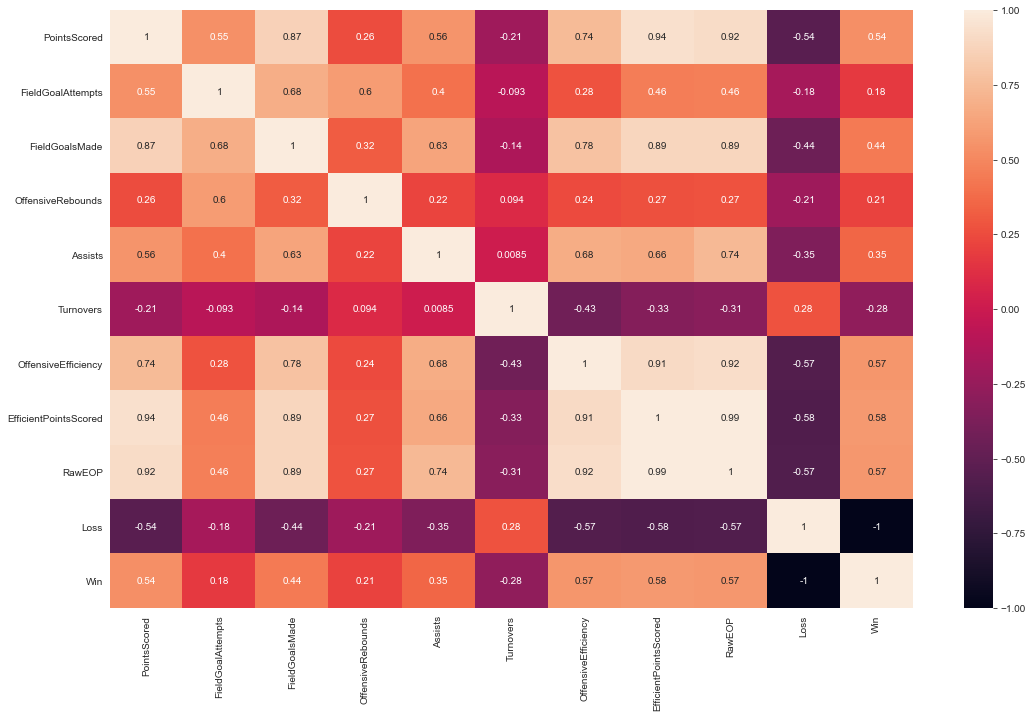

In [126]:
# Correlation heatmap
plt.figure(figsize=(18,11))
sns.heatmap(efficiency_correlations, annot = True );

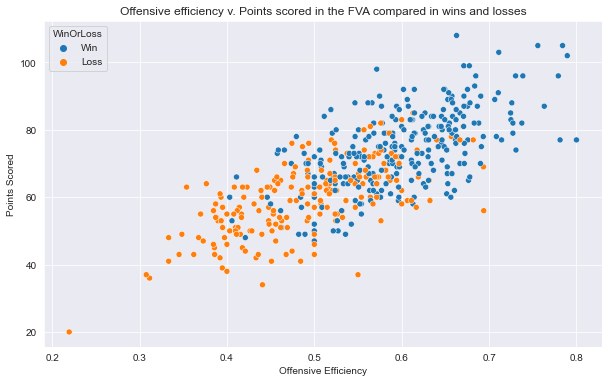

In [127]:
# Create visual for offensive efficency v. points scored
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.scatterplot(x="OffensiveEfficiency", 
                y="PointsScored", 
                hue="WinOrLoss",
                data=efficiency_fva)
plt.xlabel("Offensive Efficiency")
plt.ylabel("Points Scored")
plt.title("Offensive efficiency v. Points scored in the FVA compared in wins and losses");

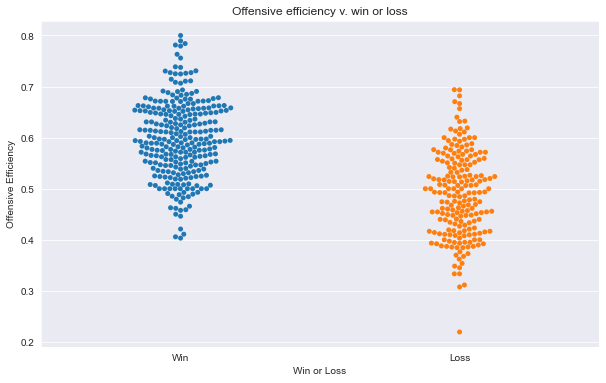

In [128]:
# Swarmplot for wins and losses with offensive efficency
plt.figure(figsize=(10,6))
sns.swarmplot(x=efficiency_fva['WinOrLoss'],
              y=efficiency_fva['OffensiveEfficiency'])
plt.ylabel("Offensive Efficiency")
plt.xlabel("Win or Loss")
plt.title("Offensive efficiency v. win or loss");

In [129]:
# Creating data frames for teams 
appleton_east = efficiency_fva[efficiency_fva.Team == 'Appleton East']
appleton_north = efficiency_fva[efficiency_fva.Team == 'Appleton North']
appleton_west = efficiency_fva[efficiency_fva.Team == 'Appleton West']
fond_du_lac = efficiency_fva[efficiency_fva.Team == 'Fond du Lac']
hortonville = efficiency_fva[efficiency_fva.Team == 'Hortonville']
kaukauna = efficiency_fva[efficiency_fva.Team == 'Kaukauna']
kimberly = efficiency_fva[efficiency_fva.Team == 'Kimberly']
neenah = efficiency_fva[efficiency_fva.Team == 'Neenah']
oshkosh_north = efficiency_fva[efficiency_fva.Team == 'Oshkosh North']
oshkosh_west = efficiency_fva[efficiency_fva.Team == 'Oshkosh West']

In [130]:
# Creating data frames for teams and numeric values
appleton_east_num = appleton_east.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_north_num = appleton_north.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_west_num = appleton_west.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
fond_du_lac_num = fond_du_lac.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
hortonville_num = hortonville.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kaukauna_num = kaukauna.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kimberly_num = kimberly.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
neenah_num = neenah.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_north_num = oshkosh_north.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_west_num = oshkosh_west.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [131]:
# Creating data frames for teams to see what they give up 
appleton_east_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton East']
appleton_north_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton North']
appleton_west_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton West']
fond_du_lac_opp = efficiency_fva[efficiency_fva.Opponent == 'Fond du Lac']
hortonville_opp = efficiency_fva[efficiency_fva.Opponent == 'Hortonville']
kaukauna_opp = efficiency_fva[efficiency_fva.Opponent == 'Kaukauna']
kimberly_opp = efficiency_fva[efficiency_fva.Opponent == 'Kimberly']
neenah_opp = efficiency_fva[efficiency_fva.Opponent == 'Neenah']
oshkosh_north_opp = efficiency_fva[efficiency_fva.Opponent == 'Oshkosh North']
oshkosh_west_opp = efficiency_fva[efficiency_fva.Opponent == 'Oshkosh West']


In [132]:
# Create numeric values
appleton_east_opp_num = appleton_east_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_north_opp_num = appleton_north_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_west_opp_num = appleton_west_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
fond_du_lac_opp_num = fond_du_lac_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
hortonville_opp_num = hortonville_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kaukauna_opp_num = kaukauna_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kimberly_opp_num = kimberly_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
neenah_opp_num = neenah_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_north_opp_num = oshkosh_north_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_west_opp_num = oshkosh_west_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression

In [169]:
# Features for machine learning model
base_features = ['FieldGoalAttempts', 'FieldGoalsMade', 'OffensiveRebounds', 'Assists', 'Turnovers', 'OffensiveEfficiency', 'EfficientPointsScored', 'RawEOP', 'PointsScored']
X = efficiency_fva_num[base_features]
X

,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,PointsScored
0,51,20,10,7,11,0.457627,33.406780,35.841356,73
1,48,25,3,14,10,0.565217,40.695652,46.709565,72
2,56,27,6,14,15,0.518987,44.632911,50.154937,86
3,55,25,12,14,21,0.500000,36.000000,41.320000,72
4,54,21,6,13,7,0.500000,30.500000,35.440000,61
...,...,...,...,...,...,...,...,...,...
470,49,21,9,11,9,0.533333,37.333333,41.792000,70
471,49,24,7,14,13,0.550725,34.695652,40.555362,63
472,50,24,4,11,7,0.546875,38.281250,42.853125,70
473,44,28,3,15,13,0.623188,52.347826,59.452174,84


In [170]:
# What we are trying to predict: Total points scored 
y = efficiency_fva.Win
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Win, dtype: uint8

In [171]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(380, 9) (95, 9) (380,) (95,)


In [172]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, train_X, train_y, cv = 10, scoring = 'accuracy')
cv.mean() * 100

76.84210526315789

In [173]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, train_X, train_y, cv = 10, scoring = 'accuracy')
cv.mean() * 100

72.10526315789473

In [190]:
knn = KNeighborsClassifier(n_neighbors = 6)
cv = cross_val_score(knn, train_X, train_y, cv = 10, scoring = 'accuracy')
cv.mean() * 100

77.36842105263158

In [175]:
# Second best
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
cv = cross_val_score(rf, train_X, train_y, cv = 10, scoring = 'accuracy')
cv.mean() * 100

79.47368421052632

In [176]:
svc = SVC(probability = True)
cv = cross_val_score(svc, train_X, train_y, cv = 10, scoring = 'accuracy')
cv.mean() * 100

78.15789473684211

In [177]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, train_X, train_y, cv = 10, scoring = 'accuracy')
cv.mean() * 100

[12:57:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

77.63157894736842

In [178]:
# Feature weights for Logistic Regression model
import eli5
from eli5.sklearn import PermutationImportance
lr.fit(train_X, train_y)
perm = PermutationImportance(lr, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.3095 ± 0.1095,PointsScored
0.2253 ± 0.0491,FieldGoalsMade
0.1811 ± 0.0710,OffensiveRebounds
0.1516 ± 0.0342,FieldGoalAttempts
0.1347 ± 0.1148,Turnovers
0.0947 ± 0.0231,EfficientPointsScored
0.0800 ± 0.0509,Assists
0.0253 ± 0.0509,RawEOP
0 ± 0.0000,OffensiveEfficiency


In [179]:
# Feature weights for Random Forest model 
rf.fit(train_X, train_y)
perm2 = PermutationImportance(rf, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm2, feature_names = val_X.columns.tolist())

Weight,Feature
0.0379 ± 0.0215,Turnovers
0.0168 ± 0.0103,OffensiveRebounds
0.0126 ± 0.0158,RawEOP
0.0063 ± 0.0434,PointsScored
0.0000 ± 0.0442,Assists
-0.0021 ± 0.0246,FieldGoalAttempts
-0.0168 ± 0.0367,FieldGoalsMade
-0.0253 ± 0.0215,OffensiveEfficiency
-0.0274 ± 0.0367,EfficientPointsScored


In [180]:
# For KNeighbors model 
data_for_prediction = val_X.iloc[0:]  # use 1 row of data here. Could use multiple rows if desired
percent_chances = rf.predict_proba(data_for_prediction)
percent_chances = pd.DataFrame(percent_chances)
percent_chances = percent_chances.rename(columns = {0 :'% chance of loss', 1: '% chance of win'})
#percent_chances
val_X = pd.DataFrame(val_X)
val_y = pd.DataFrame(val_y)
total_val = [val_X, val_y]
total_val = pd.concat(total_val, axis = 1)
total_val = total_val.reset_index(drop=True)
predictions = [total_val, percent_chances]
predictions = pd.concat(predictions, axis = 1)
predictions['% chance of loss'] = 100 * predictions['% chance of loss']
predictions['% chance of win'] = 100 * predictions['% chance of win']
predictions.to_csv('WinOrLossPredictions.csv')


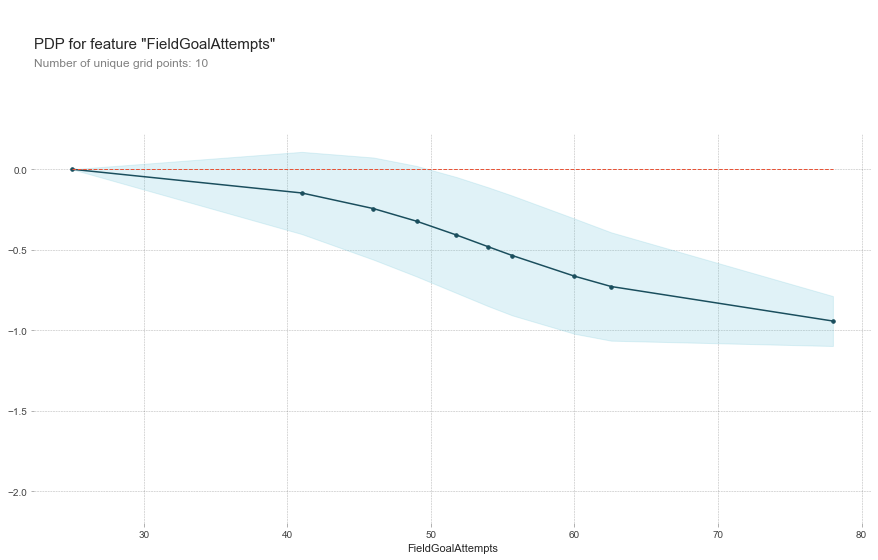

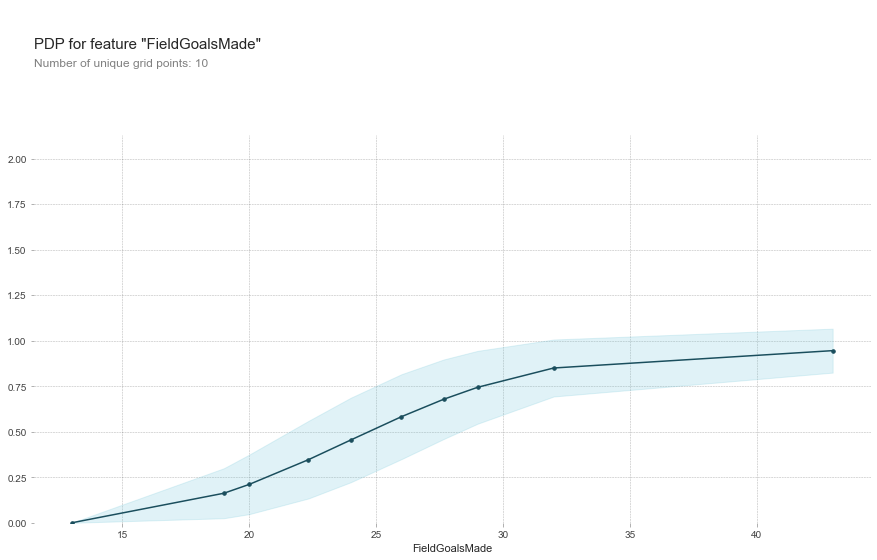

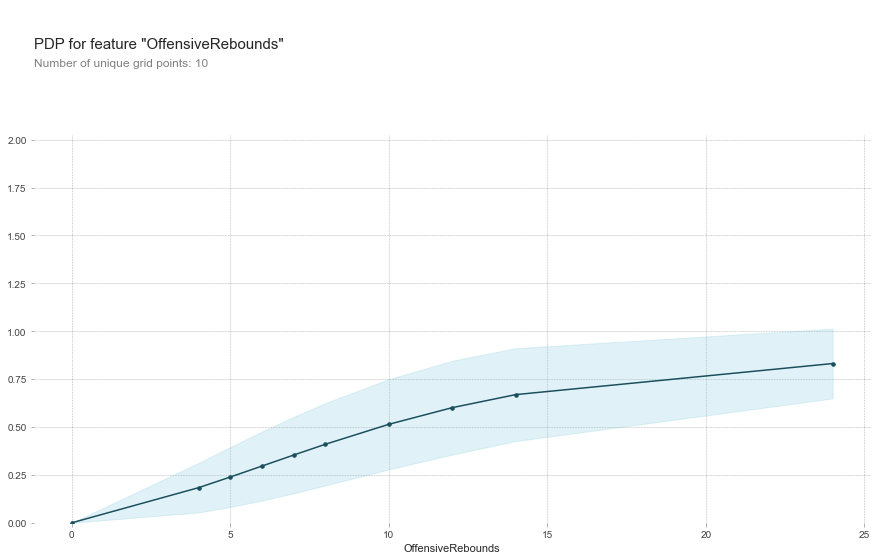

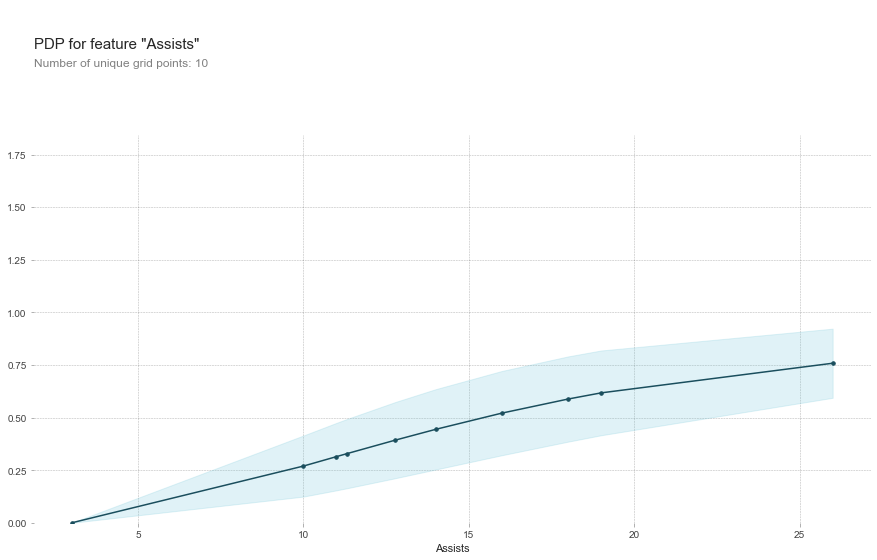

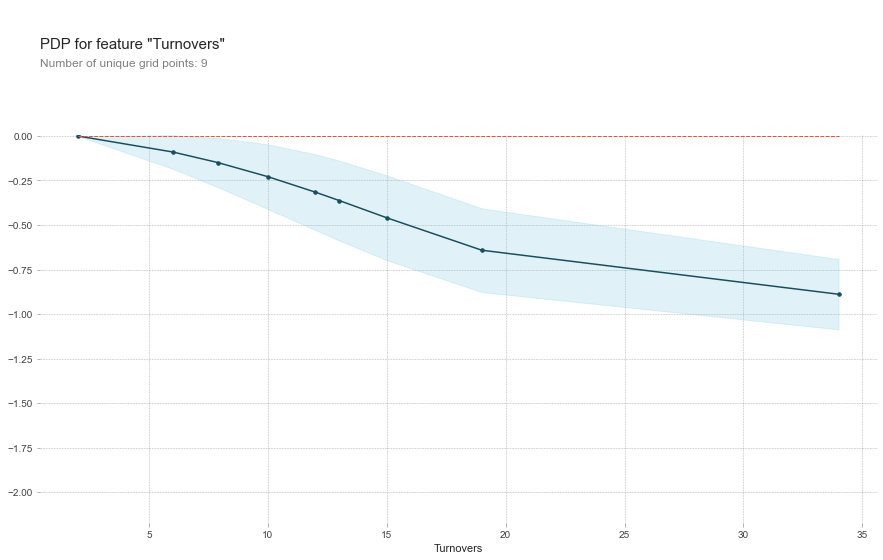

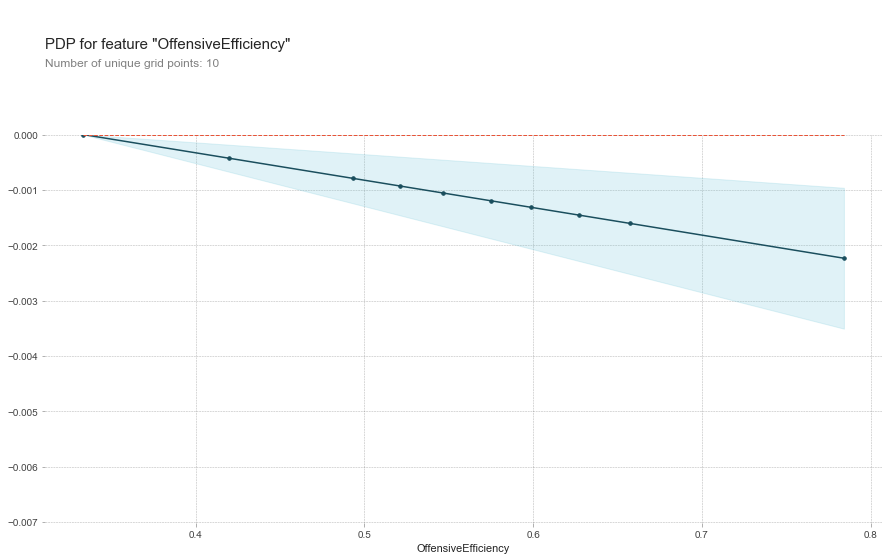

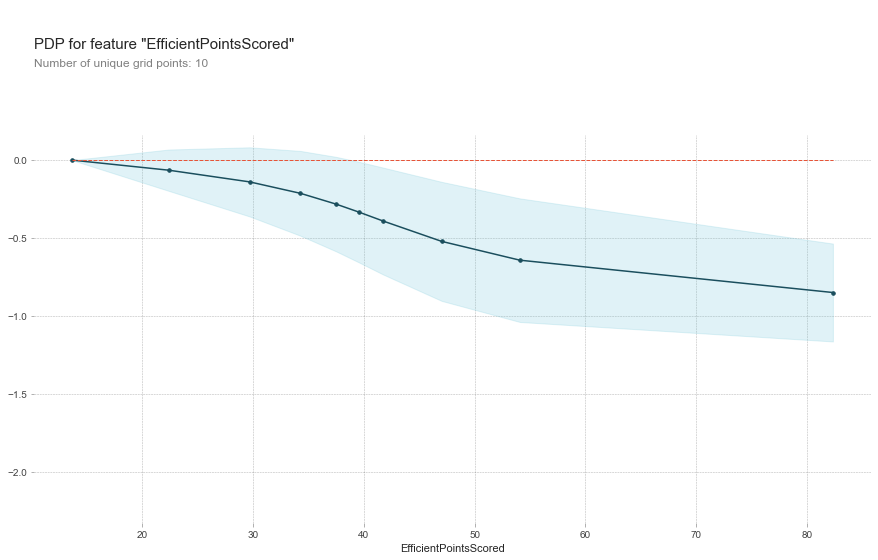

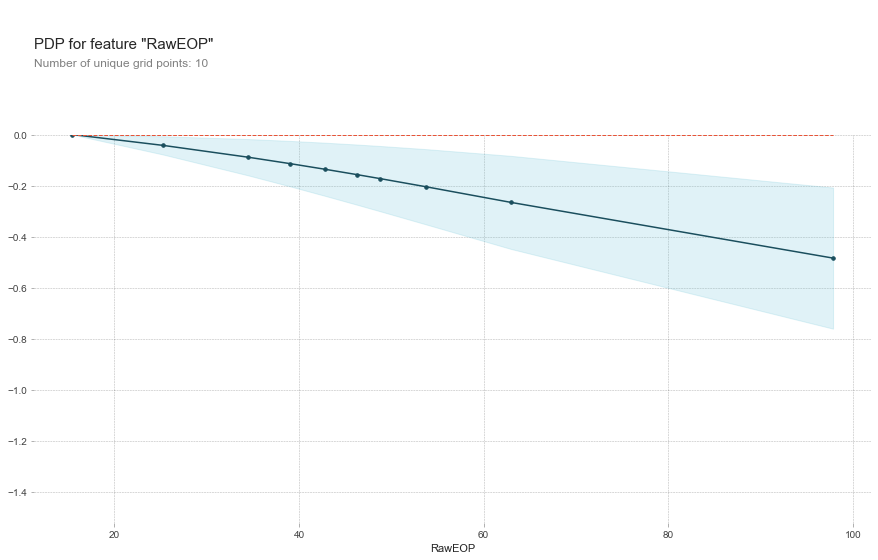

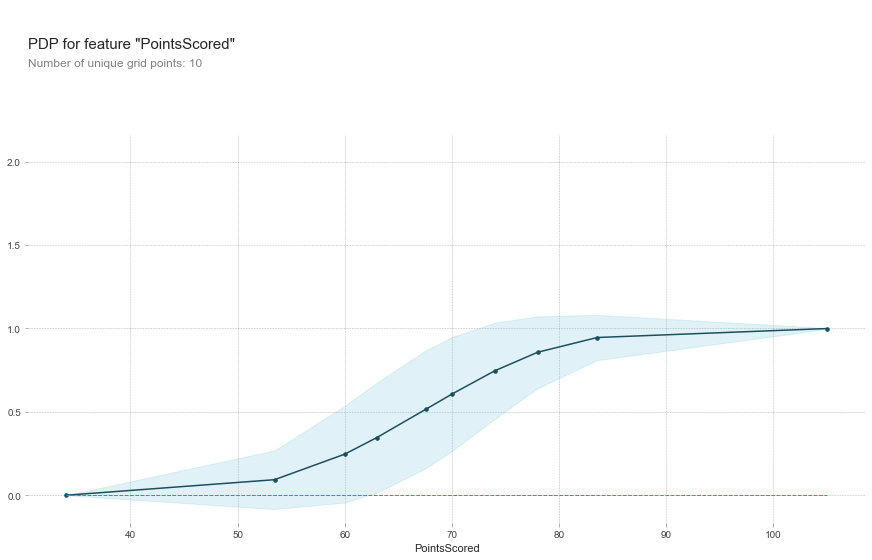

In [181]:
from pdpbox import pdp, get_dataset, info_plots
for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model = lr, dataset = val_X, model_features = base_features, feature = feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

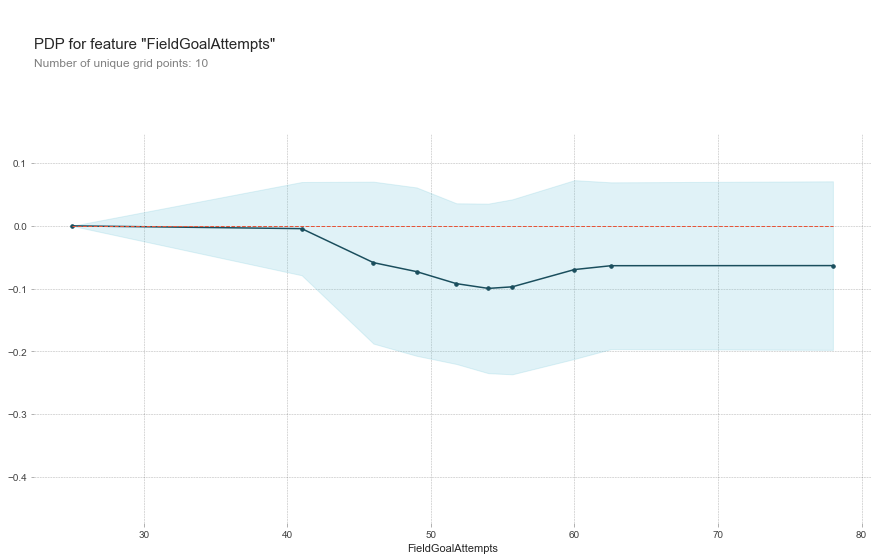

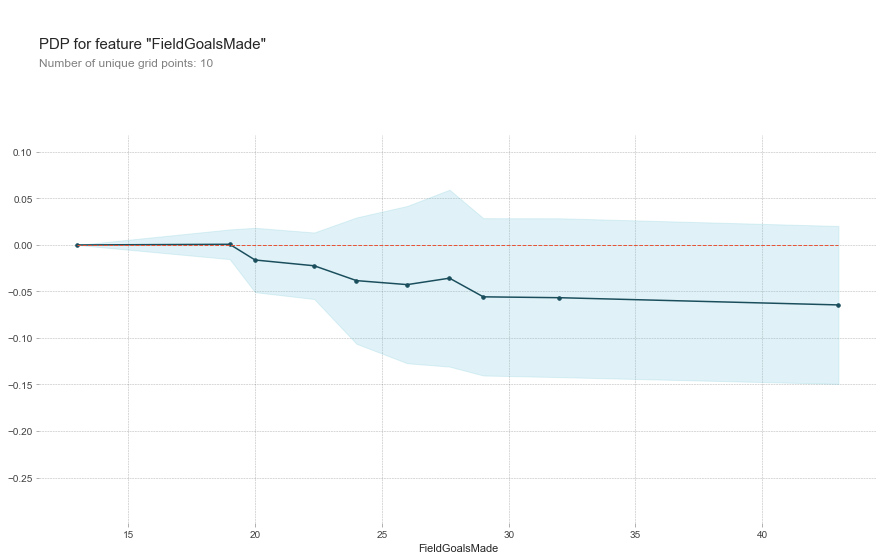

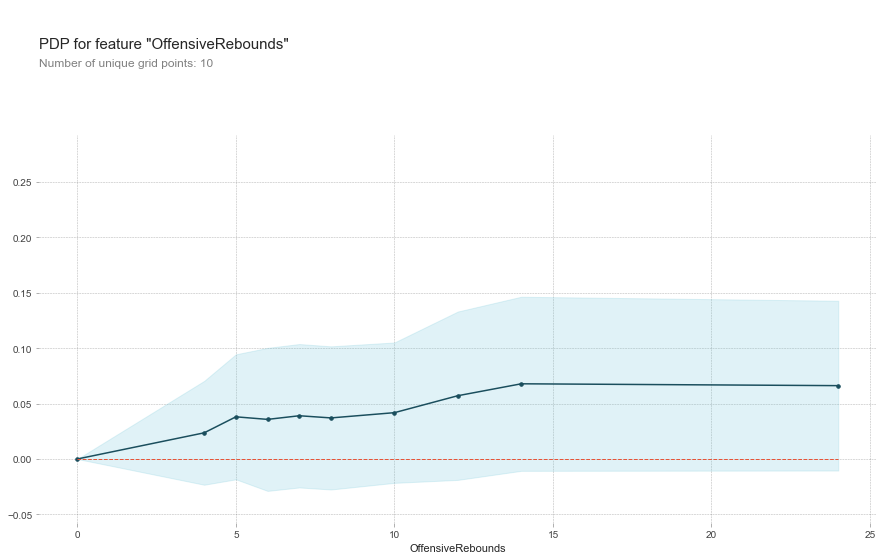

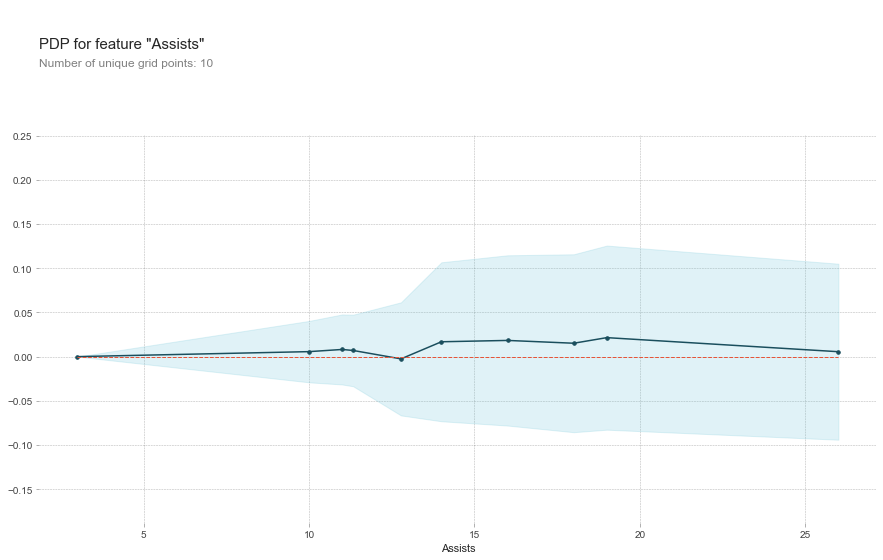

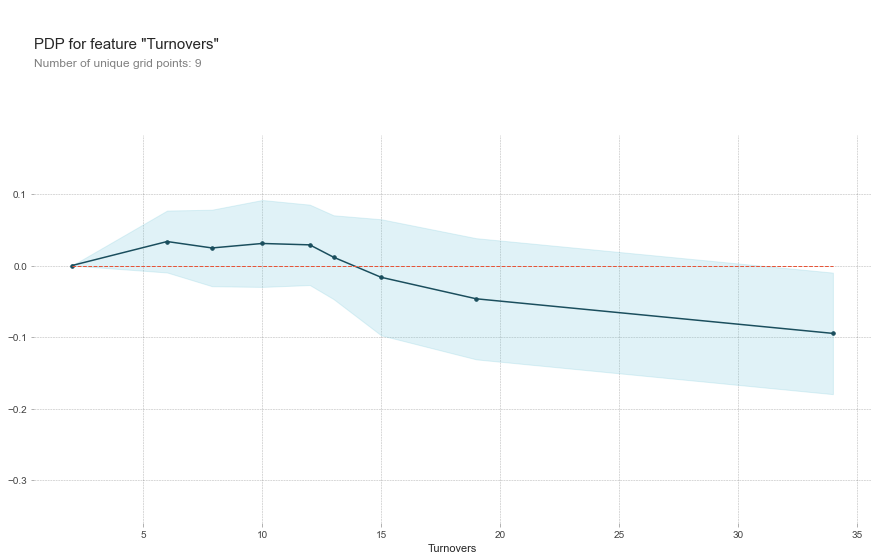

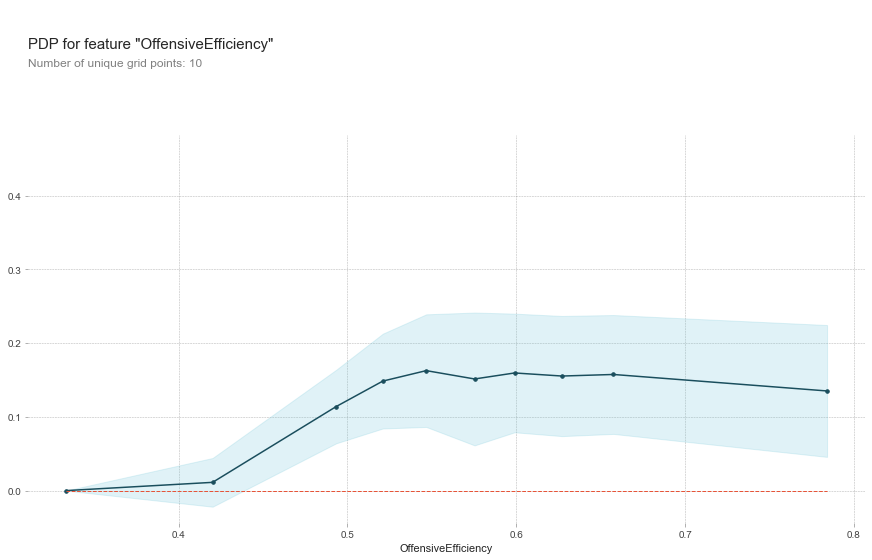

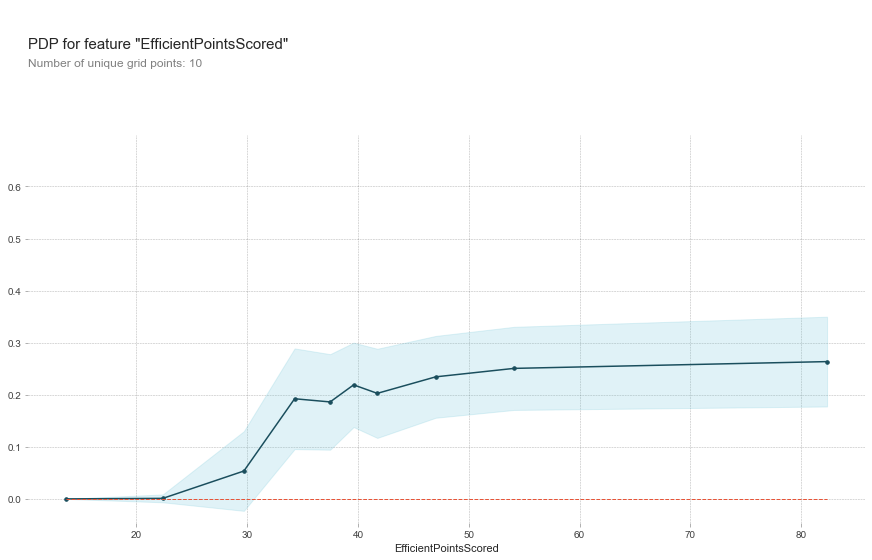

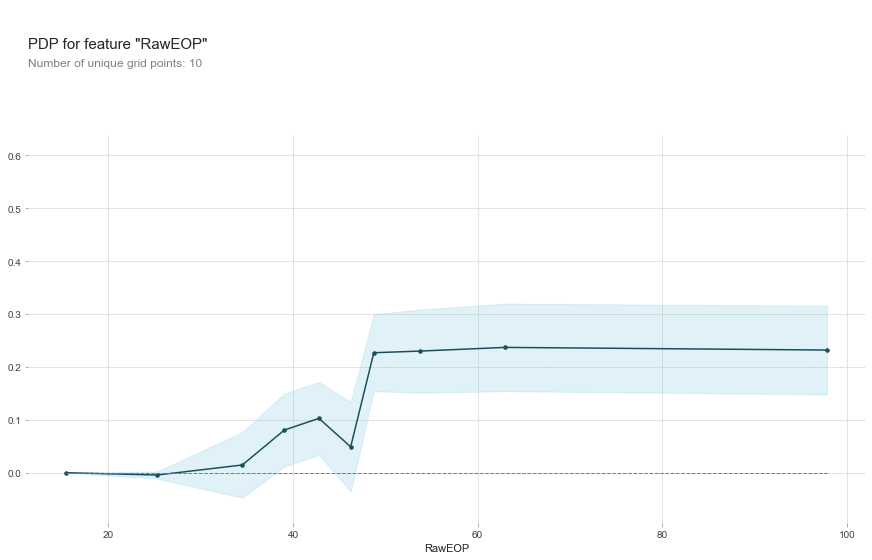

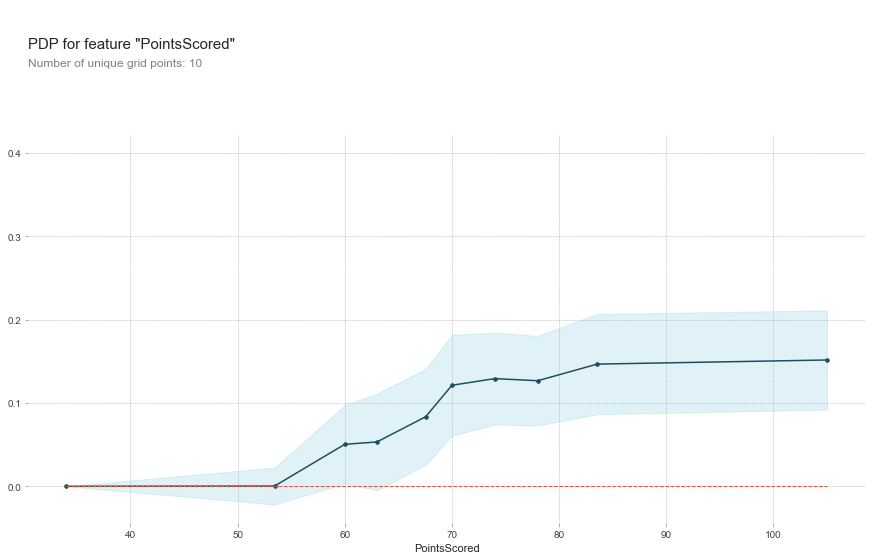

In [182]:
from pdpbox import pdp, get_dataset, info_plots
for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model = rf, dataset = val_X, model_features = base_features, feature = feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

1. feature 6 (0.178064)
2. feature 7 (0.162069)
3. feature 5 (0.145043)
4. feature 8 (0.119369)
5. feature 1 (0.094333)
6. feature 0 (0.083813)
7. feature 4 (0.078867)
8. feature 3 (0.075587)
9. feature 2 (0.062855)


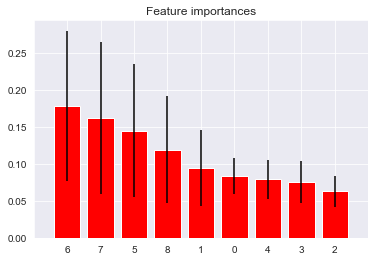

In [183]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(train_X, train_y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [184]:
base_features = pd.DataFrame(base_features)
base_features

,0
0,FieldGoalAttempts
1,FieldGoalsMade
2,OffensiveRebounds
3,Assists
4,Turnovers
5,OffensiveEfficiency
6,EfficientPointsScored
7,RawEOP
8,PointsScored


In [186]:
knn.fit(train_X, train_y)
knn.score(train_X, train_y)

0.8315789473684211

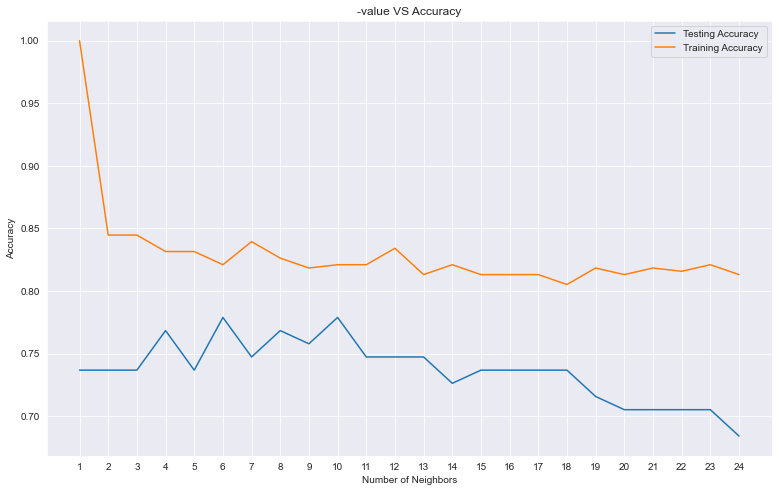

Best accuracy is 0.7789473684210526 with K = 6


In [189]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(train_X, train_y)
    #train accuracy
    train_accuracy.append(knn.score(train_X, train_y))
    # test accuracy
    test_accuracy.append(knn.score(val_X, val_y))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))